In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from analysis import Subject, logger, io
from analysis.consts import TIME_WINDOW, TRIAL_DURATION
from analysis.postprocess import calc_mean_trans_nb


logger.setLevel("INFO")

In [2]:
timer_subj_roots, control_subj_roots = io.load_path(Path("results/subjects"))

In [4]:
indeces = []
trans_list = []
for path in timer_subj_roots:
    subj = Subject(path)
    indeces.append(subj.name)
    mean_trans_nb = calc_mean_trans_nb(subj)
    trans_list.append(mean_trans_nb)

timer_df = pd.DataFrame(trans_list, index=indeces)
timer_df.columns = [
    f"{i}[s]-{i+TIME_WINDOW}[s]" for i in range(0, TRIAL_DURATION, TIME_WINDOW)
]

In [5]:
indeces = []
trans_list = []
for path in control_subj_roots:
    subj = Subject(path)
    indeces.append(subj.name)
    mean_trans_nb = calc_mean_trans_nb(subj)
    trans_list.append(mean_trans_nb)

control_df = pd.DataFrame(trans_list, index=indeces)
control_df.columns = [
    f"{i}[s]-{i+TIME_WINDOW}[s]" for i in range(0, TRIAL_DURATION, TIME_WINDOW)
]

In [6]:
control_df

,0[s]-4[s],4[s]-8[s],8[s]-12[s],12[s]-16[s],16[s]-20[s]
elliott,3.75,5.75,3.75,4.75,4.75
osman,7.75,7.75,7.25,8.50,6.50
mathilde,6.00,6.00,5.25,4.50,4.75
noemie,4.25,6.00,5.50,5.50,5.50


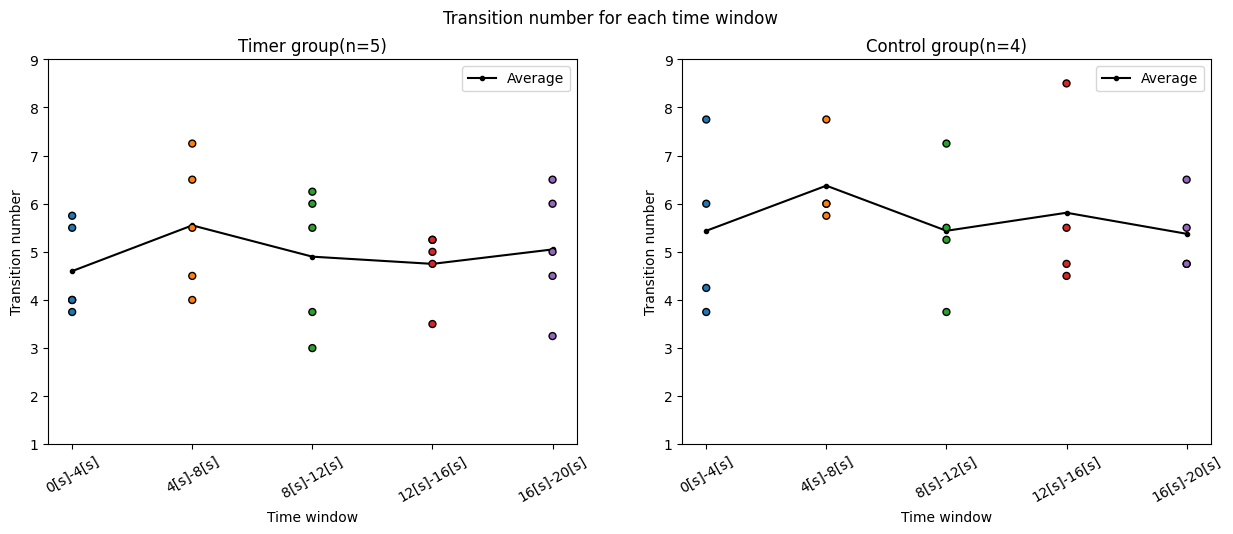

In [7]:
def plot(df, ax):
    # sns.boxplot(
    #     df,
    #     # fill=False,
    #     ax=ax,
    # )
    sns.stripplot(
        df,
        size=5,
        edgecolor="black",
        linewidth=1,
        alpha=1,
        ax=ax,
        # label="Individual data",
        jitter=False,
    )
    ax.plot(df.mean(), color="black", marker=".", label="Average")
    ax.legend()


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Transition number for each time window")

plot(timer_df, axes[0])
n = len(timer_df)
axes[0].set_title(f"Timer group({n=})")

plot(control_df, axes[1])
n = len(control_df)
axes[1].set_title(f"Control group({n=})")

for ax in axes:
    ax.set_xlabel("Time window")
    ax.set_ylabel("Transition number")
    ax.set_ylim(1, 9)
    ax.tick_params(axis="x", labelrotation=30)

plt.show()